In [2]:
import numpy as np
import matplotlib.pyplot as plt

from jlinops import _CustomLinearOperator
import jlinops

In [38]:
class GeneralSplitting:
    """Represents a splitting of R^n into the direct sum of trivially-intersecting subspaces
    \mathcal{X} and \mathcal{Y}, as well as the orthogonal complement of their union.
    """

    def __init__(self, X=None, Xperp=None, Y=None, Yperp=None):

        # Checks for what combination we have been passed
        assert (X is not None) and (Yperp is not None), "Must pass X and Xperp."
        
        self.n = X.shape[0]
        self.X = X
        self.Y = Y
        self.Xperp = Xperp
        self.Yperp = Yperp


    def orthogonal_projector(self, which):
        assert which in ["X", "Y", "Z"], "Must be one of X, Y, or Z."
        
        if which == "X":
            if self.X is not None:
                return self.X @ np.linalg.pinv(self.X)
            elif self.Xperp is not None:
                return np.eye(self.n) - ( self.Xperp @ np.linalg.norm(self.Xperp)  )
            else:
                raise NotImplementedError
        
        elif which == "Y":
            if self.Y is not None:
                return self.Y @ np.linalg.pinv(self.Y)
            elif self.Yperp is not None:
                return np.eye(self.n) - ( self.Yperp @ np.linalg.norm(self.Yperp) )
            else:
                raise NotImplementedError

        elif which == "Z":
            if (self.X is not None) and (self.Y is not None):
                A = np.hstack([self.X, self.Y])
                return np.eye(self.n) - (A @ np.linalg.pinv(A))
            else:
                raise NotImplementedError

        else:
            raise NotImplementedError
        


# Test it out

In [39]:
n = 7
x_dim = 2
y_dim = 3
X = np.random.normal(size=(n, x_dim))
Y = np.random.normal(size=(n,y_dim))

_qr = np.linalg.qr(X, mode="complete")
Xperp = _qr.Q[:,x_dim:]
_qr = np.linalg.qr(Y, mode="complete")
Yperp = _qr.Q[:,y_dim:]

In [40]:
splitting = GeneralSplitting(X=X, Yperp=Yperp)

In [52]:
P = splitting.orthogonal_projector("X")

r = np.random.normal(size=n)
p = r - (P @ r)

X.T @ p

array([-5.55111512e-16, -3.21964677e-15])

In [54]:
P = splitting.orthogonal_projector("Y")

r = np.random.normal(size=n)
p = r - (P @ r)

Yperp.T @ p

ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [16]:
qr_result = np.linalg.qr(X, mode="complete")

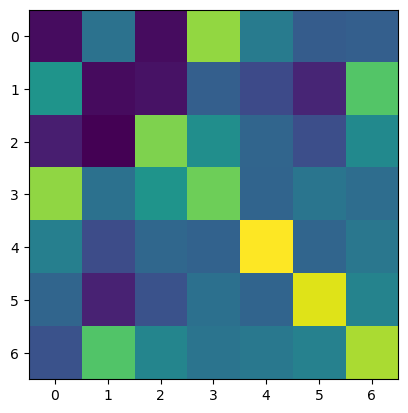

In [18]:
plt.imshow(qr_result.Q)
plt.show()

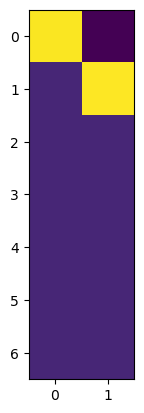

In [19]:
plt.imshow(qr_result.R)
plt.show()

In [13]:
X

array([[-1.19074286,  0.24000431],
       [ 0.6358134 , -1.29841957],
       [-1.00074863, -1.20902945],
       [ 1.82801866, -0.12912171],
       [ 0.31206176, -0.48281133],
       [-0.08203562, -0.95860468],
       [-0.37531745,  1.47807141]])

In [15]:
X[:,1] / np.linalg.norm(X[:,1])

array([ 0.09371562, -0.50700004, -0.47209546, -0.05041877, -0.18852563,
       -0.37431091,  0.57714955])

In [14]:
X[:,0] / np.linalg.norm(X[:,0])

array([-0.47030588,  0.25112624, -0.39526415,  0.72200972,  0.12325455,
       -0.03240148, -0.14823855])

In [ ]:
Orthogonal

In [ ]:
class OrthogonalProjector()